# Example 03: General Use of GLMNetCVRegressor
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slickml/slick-ml/blob/master/examples/regression/example_03_GLMNetCVRegressor.ipynb)

### Google Colab Configuration

In [1]:
# !git clone https://github.com/slickml/slick-ml.git
# %cd slick-ml
# !pip install -r requirements.txt

### Local Environment Configuration

In [2]:
# Change path to project root
%cd ../..

/home/amirhessam/Documents/GitHub/slick-ml


### Import Python Libraries

In [3]:
%load_ext autoreload

# widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
%autoreload
from slickml.regression import GLMNetCVRegressor

-----
# GLMNetCVRegressor Docstring

In [5]:
help(GLMNetCVRegressor)

Help on class GLMNetCVRegressor in module slickml.regression:

class GLMNetCVRegressor(builtins.object)
 |  GLMNetCVRegressor(alpha=None, n_lambda=None, n_splits=None, metric=None, scale=True, sparse_matrix=False, fit_intercept=True, cut_point=None, min_lambda_ratio=None, lambda_path=None, tol=None, max_iter=None, random_state=None, max_features=None)
 |  
 |  GLMNet CV Regressor.
 |  This is wrapper using GLM-Net to train a Regularized Linear Model
 |  and find the optimal penalty values through N-Folds cross validation.
 |  This function is pretty useful to train a Elastic-Net model with
 |  the ability of feature reduction. Main theoretical reference:
 |  (https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html)
 |  
 |  Parameters
 |  ----------
 |  alpha: float, optional (default=0.5)
 |      The stability parameter, 0 <= alpha <= 1: 0.0 for Ridge, 1.0 for LASSO
 |  
 |  n_lambda: int, optional (default=100)
 |      Maximum number of lambda values to compute
 |  
 |  n_splits: i

## Example

In [6]:
# loading data; note this is a multi regression data
df = pd.read_csv("data/reg_data.csv")
df.head(2)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,TARGET1,TARGET2
0,1.138,1.543333,289964.0,22.491483,111.289667,7584.0,7584.0,737.156,561.15,823.713,109600.0,99800.0,594700.0,101900.0,0.07137,0.082,0.95,0.975
1,2.088,3.086667,6960180.0,22.936100,113.807817,28204.0,28204.0,908.551,561.15,854.808,133100.0,99800.0,728200.0,101900.0,0.10655,0.287,0.95,0.975


In [7]:
# define X, y based on one of the targets
y = df.TARGET1.values
X = df.drop(["TARGET1", "TARGET2"], axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=1367)

In [9]:
# train a model
reg = GLMNetCVRegressor(alpha=0.3, 
                        n_splits=4, 
                        metric="r2")
reg.fit(X_train, y_train)

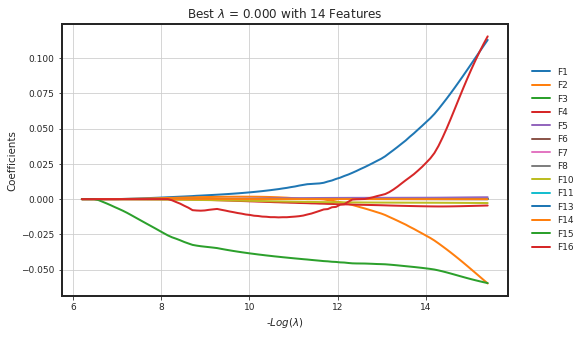

In [10]:
reg.plot_coeff_path()

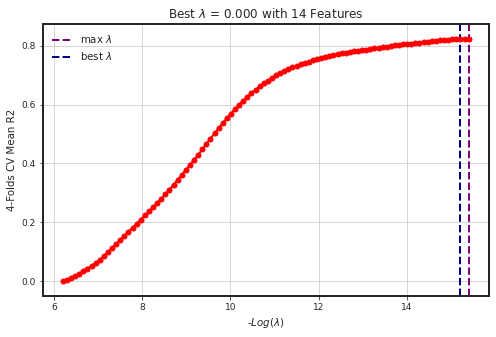

In [11]:
reg.plot_cv_results()

## You can customize the plots 

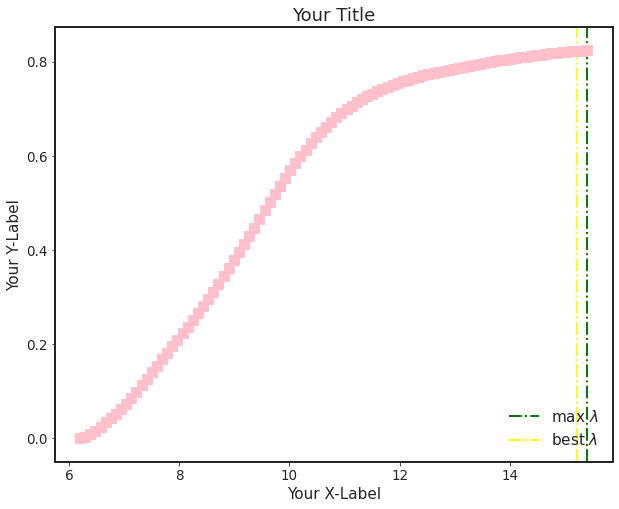

In [12]:
# plot cv_results -> you can customize it
reg.plot_cv_results(figsize=(10, 8),
                    marker="s",
                    markersize=10,
                    colors=["pink", "purple", "green", "yellow"],
                    linestyle="-.",
                    fontsize=18,
                    grid=False,
                    legend=True,
                    legendloc=4,
                    xlabel="Your X-Label",
                    ylabel="Your Y-Label",
                    title="Your Title",
                    save_path=None)

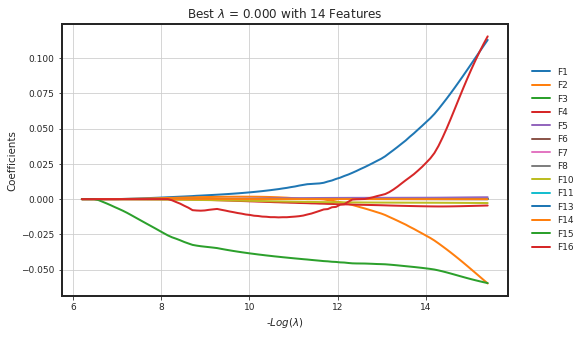

In [13]:
# plot coeff_paths
reg.plot_coeff_path()

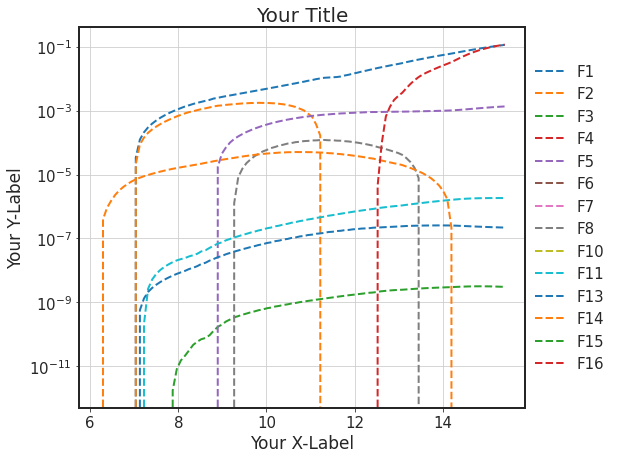

In [14]:
# plot coeff_paths
reg.plot_coeff_path(figsize=(8,7),
                    linestyle="--",
                    fontsize=20,
                    grid=False,
                    legend=True,
                    legendloc='center',
                    xlabel="Your X-Label",
                    ylabel="Your Y-Label",
                    title="Your Title",
                    bbox_to_anchor=(1.1, 0.5),
                    yscale="log",
                    save_path=None)

In [15]:
# pred class (or reg.y_pred_)
# threshold can be set 
y_pred = reg.predict(X_test)
y_pred[:10]

array([0.99248435, 0.95429357, 0.98977157, 0.97532358, 0.97518209,
       0.99185577, 0.96325692, 0.98156003, 0.99940642, 0.95760986])

## You can use the RegressionMetrics class to evaluate your model

In [16]:
from slickml.metrics import RegressionMetrics
reg_metrics = RegressionMetrics(y_test, y_pred)

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.824000,0.824000,0.005000,0.000000,0.000000,0.005000,0.986000,0.006000,1.000000


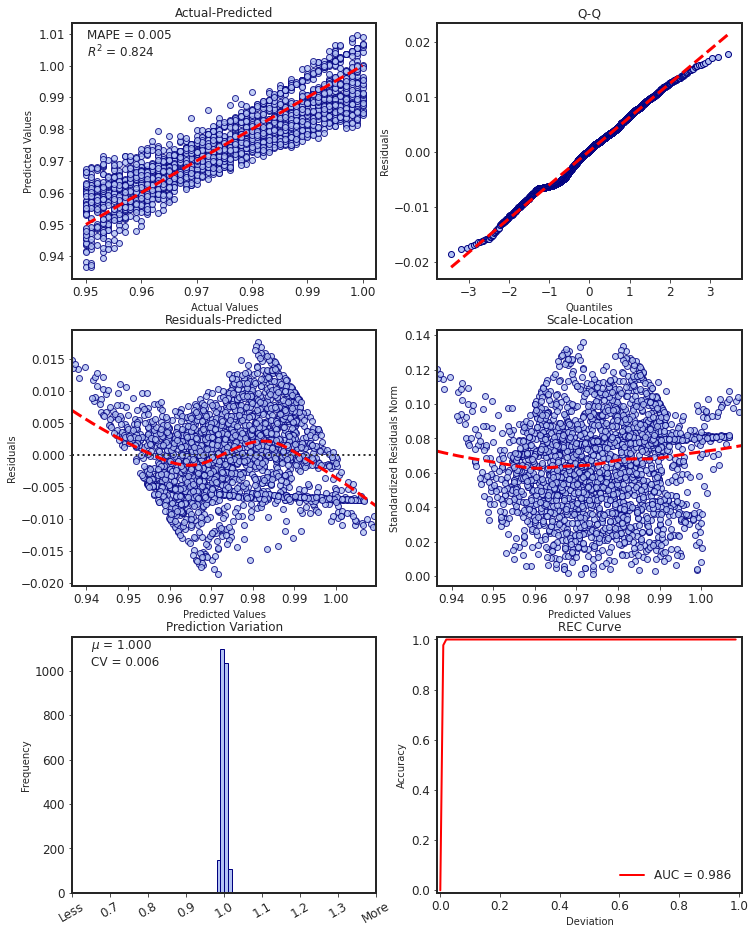

In [17]:
reg_metrics.plot()

In [18]:
# non-zero coeffs (or reg.get_coeffs())
reg.coeff_

,feature,coeff
0,F1,1.042936e-01
1,F16,1.041948e-01
2,F5,1.294896e-03
3,F11,1.839562e-06
4,F13,2.236374e-07
5,F3,3.141533e-09
6,F7,-4.545219e-07
7,F6,-6.342978e-07
8,F14,-6.244697e-06
9,F8,-1.220010e-04


In [19]:
# intercept (or reg.get_intercept())
reg.intercept_

3.531360264806584

In [20]:
# model cv_results_ (or reg.get_cv_results())
reg.cv_results_

,F1_coeff_path,F2_coeff_path,F3_coeff_path,F4_coeff_path,F5_coeff_path,F6_coeff_path,F7_coeff_path,F8_coeff_path,F9_coeff_path,F10_coeff_path,F11_coeff_path,F12_coeff_path,F13_coeff_path,F14_coeff_path,F15_coeff_path,F16_coeff_path,intercept_path,lambda_path,cv_standard_error,cv_mean_score
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.974985,2.034679e-03,0.000574,0.000574
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,-0.000006,0.000000,0.0,0.000000e+00,3.978800e-07,0.000000,0.000000,0.939349,1.853923e-03,0.000589,0.000589
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,-0.000013,0.000000,0.0,0.000000e+00,9.206245e-07,0.000000,0.000000,0.892408,1.689226e-03,0.000601,0.000601
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,-7.091993e-07,0.0,-0.000020,0.000000,0.0,0.000000e+00,1.525913e-06,0.000000,0.000000,0.837276,1.539160e-03,0.000633,0.000633
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,-2.375408e-06,0.0,-0.000026,0.000000,0.0,0.000000e+00,2.325619e-06,-0.000619,0.000000,0.761926,1.402425e-03,0.000653,0.000653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.095760,-0.049761,3.189563e-09,-0.004822,0.001243,-6.202067e-07,-4.446505e-07,-1.163453e-04,0.0,-0.002699,0.000002,0.0,2.281868e-07,-6.204324e-06,-0.056708,0.091840,3.504727,2.951970e-07,0.000936,0.000936
96,0.100027,-0.052247,3.169031e-09,-0.004748,0.001269,-6.277150e-07,-4.497802e-07,-1.195171e-04,0.0,-0.002716,0.000002,0.0,2.258422e-07,-6.258794e-06,-0.057446,0.098177,3.521666,2.689726e-07,0.000999,0.000999
97,0.104294,-0.054741,3.141533e-09,-0.004673,0.001295,-6.342978e-07,-4.545219e-07,-1.220010e-04,0.0,-0.002733,0.000002,0.0,2.236374e-07,-6.244697e-06,-0.058151,0.104195,3.531360,2.450778e-07,0.001143,0.001143
98,0.108543,-0.057234,3.107882e-09,-0.004597,0.001319,-6.400745e-07,-4.588756e-07,-1.238680e-04,0.0,-0.002750,0.000002,0.0,2.215451e-07,-6.176417e-06,-0.058823,0.109891,3.535247,2.233057e-07,0.001198,0.001198


In [21]:
# total model results json (or reg.get_results()); here only shows the keys
reg.results_.keys()

dict_keys(['coeff', 'coeff_path', 'cv_standard_error', 'cv_mean_score', 'lambda_path', 'lambda_best', 'lambda_max', 'n_lambda', 'intercept', 'intercept_path', 'params', 'module'])

In [22]:
# model's fitting params (or reg.get_params())
reg.params_

{'alpha': 0.3,
 'cut_point': 1.0,
 'fit_intercept': True,
 'lambda_path': None,
 'lower_limits': -inf,
 'max_features': None,
 'max_iter': 100000,
 'min_lambda_ratio': 0.0001,
 'n_jobs': -1,
 'n_lambda': 100,
 'n_splits': 4,
 'random_state': 1367,
 'scoring': 'r2',
 'standardize': True,
 'tol': 1e-07,
 'upper_limits': inf,
 'verbose': False}